# Binary Language Detection - Translated Assessment - Exercise 1

### Usage
In order to use this notebook, the Language Detection Dataset from Kaggle is required. 
You can either download it directly from Kaggle at https://www.kaggle.com/datasets/basilb2s/language-detection, after logging in, or download it through the next code block by using a Kaggle API token.

### 1. Download the dataset from the website, upload it to your Google Drive, mount it into this notebook.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
data_path = '/content/drive/My Drive/Datasets/Language Detection.csv'

### 2. Donwload the dataset through a Kaggle API token.
First, you need to upload your kaggle.json file into the root of your drive. Then, execute the cells below (for more details please refer to the readme.me in GitHub repository).


In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mkdir -p /root/.kaggle
!cp '/content/drive/My Drive/kaggle.json' /root/.kaggle/

In [ ]:
# Move to the directory in which you want to download the dataset
%cd /content/drive/MyDrive/Datasets

In [ ]:
# Download the dataset and unzip it
!kaggle datasets download -d basilb2s/language-detection
!unzip language-detection.zip

### Import libraries and useful dependencies

In [17]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Save models
import datetime
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and machine learning
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### Load data into a pandas DataFrame

In [3]:
data_path = '/content/drive/My Drive/Datasets/Language Detection.csv'
data = pd.read_csv(data_path)

We can visualize and analyze the data in this dataset by using the following functions

In [42]:
print("First rows of the DataFrame: \n")
data.head()

First rows of the DataFrame: 



,Text,Language
0,"Nature, in the broadest sense, is the natural...",0
1,"""Nature"" can refer to the phenomena of the phy...",0
2,"The study of nature is a large, if not the onl...",0
3,"Although humans are part of nature, human acti...",0
4,[1] The word nature is borrowed from the Old F...,0


From the **data.info()** we can notice that the dataset has 10337 entries and consists of two columns: "Text" and "Language". Both columns are of type object and contain no missing values. The "Text" column contains the text data, while the "Language" column contains the language in which the text is written. The memory usage of the dataframe is 161.6 KB.

In [67]:
print("Data info: \n")
display(data.info())
print("\n")
print("Language column of the DataFrame: \n")
display(data.Language)
print("\n")
print("Text column of the DataFrame: \n")
display(data.Text)
print("\n")
print("Italian sentences: \n")
italian_data = data[data["Language"] == "Italian"]
print(italian_data["Text"])


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


None



Language column of the DataFrame: 



0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object



Text column of the DataFrame: 



0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object



Italian sentences: 

7114    Nature è una delle più antiche ed importanti r...
7115        [1] Viene pubblicata fin dal 4 novembre 1869.
7116    [2] Nonostante la maggior parte delle riviste ...
7117    Molti sono gli avanzamenti e le scoperte, prov...
7118    Il fattore di impatto (impact factor) di quest...
                              ...                        
7807    qual è stato il tuo errore, ti diamo da mangia...
7808    narcisa ha cambiato i suoi modi in un primo mo...
7809    Come' Il narcisismo di adesso Marian ha detto ...
7810    immagino che non vorrebbe più pane d'oro adess...
7811    Terry in realtà assomigli un po 'a quell'angel...
Name: Text, Length: 698, dtype: object


The **data.describe()** shows that there are 10267 unique sentences in the dataset, and 17 unique languages. The most frequent language is English, with 1385 occurrences, and the most common sentence is "Jag är ledsen" (which means "I am sorry" in Swedish), occurring 3 times. These statistics can be helpful to get a quick overview of the dataset and understand some of its characteristics.


In [33]:
print("Data description: \n")
print(data.describe())

Data description: 

                  Text Language
count            10337    10337
unique           10267       17
top     Jag är ledsen.  English
freq                 3     1385


**value_counts()** shows the distribution of languages present in the dataset.The counts of each language are displayed in descending order, with English being the most common language and Hindi being the least common. The counts indicate the number of entries in the dataset for each language, with some languages having significantly more entries than others. he count distribution suggests that there is an imbalance in the dataset, with Italian being one of the minority classes. This may affect the performance of the machine learning model since it may be biased towards the majority class. To address this issue, it may be necessary to balance the dataset by either oversampling the minority class, undersampling the majority class, or using a combination of both techniques.

Language counts: 



English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

<Axes: title={'center': 'Language detection dataset counts'}>

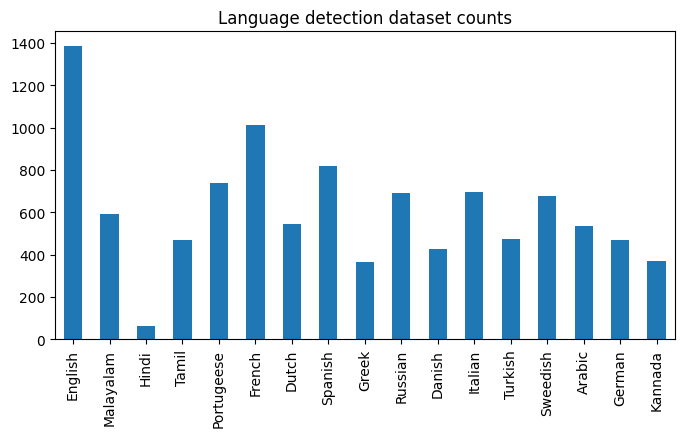

In [35]:
print("Language counts: \n")
display(data["Language"].value_counts())
data.Language.value_counts()[data.Language.unique()].plot.bar(title="Language detection dataset counts",figsize=(8,4))

We can notice that there are two mispelled languages: "Portugeese" and "Sweedish", which need to be corrected.

In [4]:
data.Language.replace(to_replace=["Portugeese", "Sweedish"],value=["Portugese","Swedish"],inplace=True)

### Data preparation
We use a lambda function to map "Italian" class to 1, and any other language to 0.

In [5]:
lang_map = lambda x: 1 if x == 'Italian' else 0
data["Language"] = data["Language"].apply(lang_map)
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",0
1,"""Nature"" can refer to the phenomena of the phy...",0
2,"The study of nature is a large, if not the onl...",0
3,"Although humans are part of nature, human acti...",0
4,[1] The word nature is borrowed from the Old F...,0


Prepare the labels and the data to be split in training and test sets.

In [6]:
X_text_data = data["Text"]
print(X_text_data.shape)

Y = list(data["Language"])
print(len(Y))

(10337,)
10337


### Data cleaning
To improve accuracy of the language detection model, we need to clean our raw text data. The following regex-based text cleaning operations include removing special characters, symbols, numbers, URLs, HTML tags, and extra spaces. Additionally, the texts are converted to lowercase.

In [7]:
def clean_text(data): 
    data_text_list = []
    for text in data:
        text = re.sub(r'[\.!@#$(),\n"%^*?\+\-\':;~`0-9\=\[\]]', ' ', text) # removing special characters, symbols and numbers
        text = re.sub(r'http[s]?\://\S+|www\.\S+', ' ', text) # removing URLs
        text = re.sub(r'<.*?>', ' ', text) # removing html tags
        text = re.sub(r'\s+'," ", text) # removing extra large spaces
        text = text.lower() # lower case
        data_text_list.append(text)
    return data_text_list


In [8]:
clean_data_list = clean_text(X_text_data)
X_text_data = clean_data_list
print(clean_data_list[7117])
print("Number of sentences: ", len(X_text_data))

molti sono gli avanzamenti e le scoperte provenienti da molti campi della ricerca scientifica che sono stati pubblicati su nature come articoli o lettere ad esempio la scoperta dei raggi x la natura ondulatoria delle particelle la scoperta dei neutroni le scoperte sulla fissione nucleare la struttura a doppia elica del dna la prima struttura molecolare di una proteina la mioglobina la tettonica a zolle il buco dell ozono la prima clonazione di un mammifero la pecora dolly il sequenziamento del genoma umano 
Number of sentences:  10337


### Train and test split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_text_data, Y, test_size = 0.20, random_state=42)

### Model selection
We can build our machine learning model for the binary language detection task by performing a grid search among different ML algorithms.
The main algorithms suitable for this task are the following:


*   Multinomial Naive Bayes Classifier
*   Support Vector Machines (SVM)
*   Random Forest Classifier
*   SGD Classifier
*   Logistic Regression
*   KNN

Since the dataset is highly imbalanced, we can set `class_weights='balanced'` for SVC and Random Forest classifier. 

In a similar way, we can provide MultinomialNB with `fit_prior=True` and `class_prior=[0.5,0.5]`. In fact, if we use a Naive Bayes classifier with `fit_prior=True` (which is the default), the classifier will estimate the class priors from the data. Since the data is imbalanced, the estimated class priors will be biased towards the majority class. This means that the classifier will assign a higher weight to class 0 during training, even if the features are more predictive of class 1. As a result, the classifier may have lower accuracy and higher false negative rate (i.e., it may incorrectly classify class 1 instances as class 0) for the minority class.
To address this issue, we can set the `class_prior` parameter explicitly to balance the class distribution



In [10]:
# Define the parameter grids for each algorithm
pipeline_estimators = Pipeline([
        ('vectorizer', None),
        ('estimator', None)
    ])

param_grids = [
    {
    'estimator': [SVC(class_weight='balanced')],
        'vectorizer': [TfidfVectorizer(), CountVectorizer()],
        'estimator__kernel': ['linear', 'rbf'],
        'estimator__C': [0.1, 1, 10]
    },
    {
    'estimator': [MultinomialNB(fit_prior=True,class_prior=[0.5, 0.5])],
        'vectorizer': [TfidfVectorizer(), CountVectorizer()],
        'estimator__alpha': [0.1, 1, 10]
    },
    {
    'estimator': [RandomForestClassifier(class_weight='balanced')],
        'vectorizer': [TfidfVectorizer(), CountVectorizer()],
        'estimator__n_estimators': [50, 100],
        'estimator__max_depth': [None, 10, 20]
    },
    {
    'estimator': [SGDClassifier()],
        'vectorizer': [TfidfVectorizer(), CountVectorizer()],
        'estimator__alpha': [0.001, 0.01, 0.1],
        'estimator__loss': ['hinge', 'log']
    }
]

# Train and evaluate each algorithm using grid search
grid_search = GridSearchCV(pipeline_estimators, param_grids, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, Y_train)
# Print the best parameters and the accuracy on the validation set
print(f"Best parameters: ", grid_search.best_params_)
print(f"Best score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Best estmator: ", best_model)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
accuracy_best_estimator = accuracy_score(Y_test, y_pred)

print(f"Accuracy grid search: {accuracy:.5f}\n")
print(f"Accuracy best estimator: {accuracy_best_estimator:.5f}\n")

Best parameters:  {'estimator': MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5]), 'estimator__alpha': 0.1, 'vectorizer': CountVectorizer()}
Best score:  0.9713728211129032
Best estmator:  Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('estimator',
                 MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5]))])
Accuracy grid search: 0.99758

Accuracy best estimator: 0.99758



### Results
Confusion matrix, report and ROC AUC


In [11]:
def plot_CM(Y_test, y_pred, estimator):
    class_names = ['Not Italian','Italian']
    cm = confusion_matrix(Y_test, y_pred)
    
    # create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=class_names, yticklabels=class_names, ax=ax)

    # set the axis labels and title
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    
    # get the name of the estimator
    estimator_name = type(estimator.named_steps['estimator']).__name__
    print(estimator_name)
    if estimator_name == 'MultinomialNB':
        estimator_name = 'Multinomial Naive Bayes'
    elif estimator_name == 'SVC':
        estimator_name = 'Support Vector Machine'
    elif estimator_name == 'RandomForestClassifier':
        estimator_name = 'Random Forest'
    elif estimator_name == 'SGDClassifier':
        estimator_name = 'Stochastic Gradient Descent'
    elif estimator_name == 'LogReg':
        estimator_name = 'Logistic Regression'

    ax.set_title('Confusion Matrix for ' + estimator_name)

    # show the plot
    plt.show()

    
def plot_roc_auc(y_true, y_pred):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

MultinomialNB


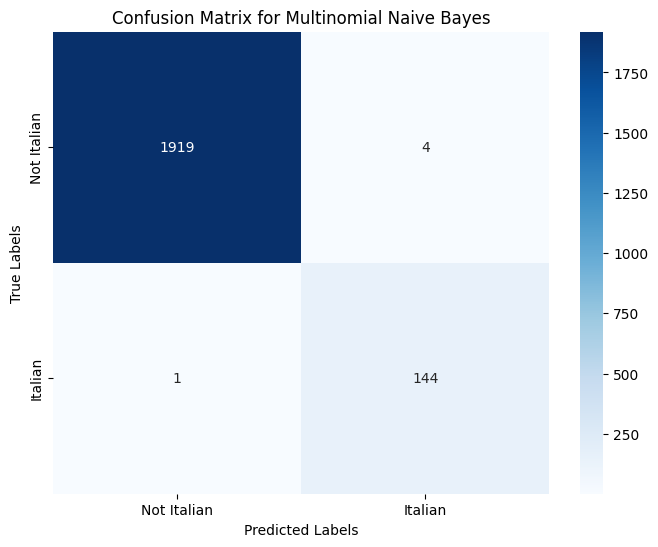

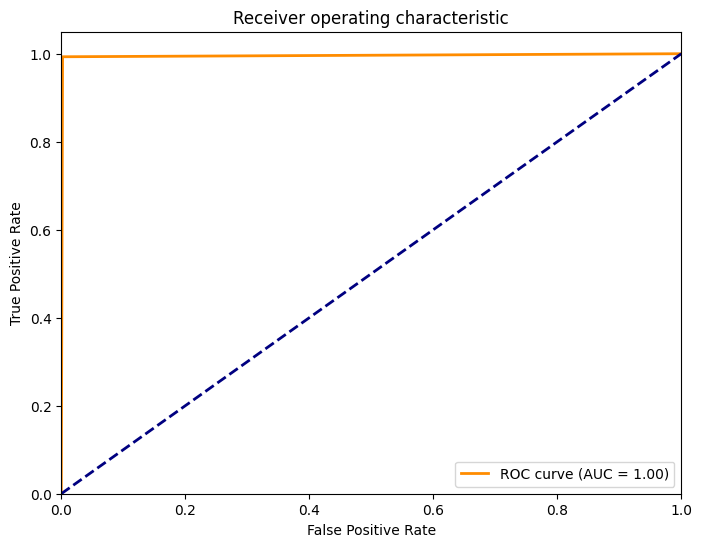

In [18]:
plot_CM(Y_test, y_pred, best_model)
plot_roc_auc(Y_test, y_pred)


In [ ]:
save_path = '/content/drive/My Drive/Datasets/Models-LanguageDetection'

now = datetime.datetime.now()
date_time = now.strftime("%Y-%m-%d_%H-%M-%S")
estimator_name = type(best_model.named_steps['estimator']).__name__
save_file_path = save_path + estimator_name + '_' + date_time + '.pkl'
with open(save_file_path, 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)